# Workshop #7: Regression Analysis

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Problem 1
The file `heights_and_weights.csv` contains data about a set of males and their heights (in cm) and weights (in kg). You want to set up a model which will predict weight from height.
* Make a scatter plot of the data. Based on the scatter plot alone, is a linear model appropriate for the data?

Build the linear model $\hat{y} = b_0 + b_1 x$
* Make the residual plot for the data. Based on the value of $R^2$ and the residual plot, do you think a linear model is appropriate for the data?

It makes sense that weight = 0 would relate to height = 0.
* Build the linear regression model **without an intercept**: $\hat{y} = b_1 x$. To build this model, instance the model object as `LinearRegression(fit_intercept=False)`. Note: `fit_intercept` is `True` by default.
* Determine whether this, second, linear model is appropriate for the data.

In [2]:
# linearen model. Ke ispadne deka vtoriot del od modelot, so intercept ne e soodveten, bidejki ima pattern

In [3]:
# Load the data
df_1 = pd.read_csv('heights_and_weights.csv')
display(df_1.head())

,height,weight
0,187.6,109.7
1,174.7,73.6
2,188.2,96.5
3,182.2,99.8
4,177.5,93.6


Based on the scatter plot alone, the linear model is appropriate for the data


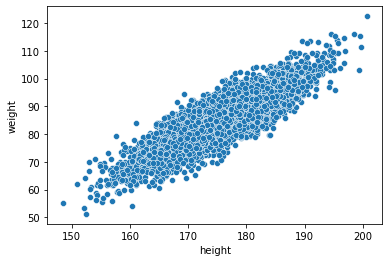

In [4]:
# Scatter plot
# plt.figure()
# plt.scatter(df_1['height'], df_1['weight'])
# plt.show()

sns.scatterplot(data=df_1, x = 'height', y = 'weight')
print('Based on the scatter plot alone, the linear model is appropriate for the data')

In [5]:
# Build the linear model  𝑦̂ =𝑏0+𝑏1𝑥
X = np.array(df_1['height']).reshape(-1,1)
y = np.array(df_1['weight']).reshape(-1,1)

model_1 = LinearRegression() 
model_1.fit(X,y) #to find the optimal values b0, b1 etc.

print('b_0 = intercept = ', model_1.intercept_)
print('b_1 = slope = ', model_1.coef_)
print(f'y-hat = b_0 + b_1*x = {model_1.intercept_[0]} + {model_1.coef_[0][0]}*x')

b_0 = intercept =  [-101.81760837]
b_1 = slope =  [[1.06457237]]
y-hat = b_0 + b_1*x = -101.81760837467509 + 1.0645723740552806*x


[[ 11.803831  ]
 [-10.56318537]
 [ -2.03491242]
 ...
 [ 11.02739031]
 [ -7.42164923]
 [  1.77852513]]


<AxesSubplot:ylabel='Count'>

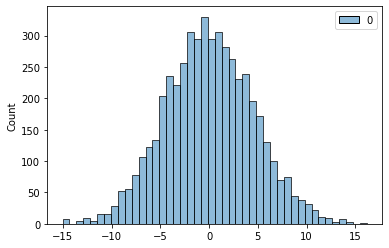

In [6]:
# Make the residual plot for the data. Based on the value of  𝑅2  and the residual plot, do you think a linear model is appropriate for the data?
resid_1 = y - model_1.predict(X) #the average of the residuals is always 0
print(resid_1)

sns.histplot(resid_1)

In [7]:
# Calculate r and r^2
r_sq_1 = model_1.score(X,y)
r_1 = np.sqrt(r_sq_1)
print('Determination coefficient: r^2 = ', r_sq_1)
print('Correlation coefficient: r = ', r_1)
print('The linear model is appropriate for the data, it is normally distributed')

Determination coefficient: r^2 =  0.7447043947011015
Correlation coefficient: r =  0.8629625685399694
The linear model is appropriate for the data, it is normally distributed


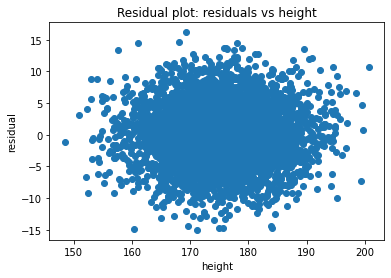

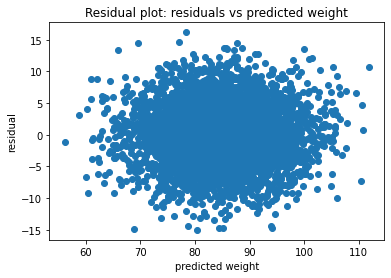

I would say that there is a round pattern, but it might be that all dots are scattered around :(


In [8]:
# Make a residual plot
plt.figure()
plt.scatter(X, resid_1)
plt.xlabel('height')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs height')
plt.show()

plt.figure()
plt.scatter(model_1.predict(X), resid_1)
plt.xlabel('predicted weight')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted weight')
plt.show()

print('I would say that there is a round pattern, but it might be that all dots are scattered around :(')

In [9]:
# Build the linear regression model without an intercept:  𝑦̂ =𝑏1𝑥 . To build this model, instance the model object as LinearRegression(fit_intercept=False). Note: fit_intercept is True by default.

model_1_wo_int = LinearRegression(fit_intercept=False) 
model_1_wo_int.fit(X,y)

print('b_1 = slope = ', model_1_wo_int.coef_)
print(f'y-hat = b_1*x = {model_1_wo_int.coef_[0][0]}*x')

b_1 = slope =  [[0.48484046]]
y-hat = b_1*x = 0.48484046014829485*x


In [10]:
resid_1_wo_int = y - model_1_wo_int.predict(X)
print(resid_1_wo_int)

[[ 18.74392968]
 [-11.10162839]
 [  5.2530254 ]
 ...
 [  7.88015368]
 [ -3.84399565]
 [  3.55900977]]


In [11]:
# Calculate r and r^2
r_sq_1_wo_int = model_1_wo_int.score(X,y)
r_1_wo_int = np.sqrt(r_sq_1_wo_int)
print('Determination coefficient: r^2 = ', r_sq_1_wo_int)

Determination coefficient: r^2 =  0.5234792263989148


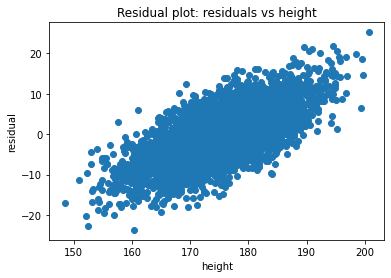

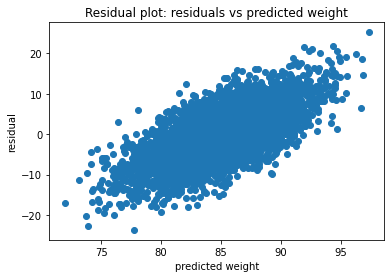

Looks like a halley comet on the right :)


In [12]:
# Make a residual plot
plt.figure()
plt.scatter(X, resid_1_wo_int)
plt.xlabel('height')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs height')
plt.show()

plt.figure()
plt.scatter(model_1_wo_int.predict(X), resid_1_wo_int)
plt.xlabel('predicted weight')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted weight')
plt.show()
print('Looks like a halley comet on the right :)')

## Problem 2
The file named `mutual_funds.csv` contains information about 45 mutual funds that are part of the Morningstar Funds 500 for 2008. The data set includes the following five variables:

    * Fund Type: The type of fund, labeled DE (Domestic Equity), IE (International Equity), and FI (Fixed Income).
    * Net Asset Value (35.53$): The closing price per share on December 31, 2007.
    * Expense Ratio (%): The percentage of assets deducted each fiscal year for fund expenses.
    * Morningstar Rank: The risk adjusted star rating for each fund, from a low of 1-Star to a high of 5-Stars. 
    * 5-Year Average Return (%): The average annual return for the fund over the past five years.

The goal of this exercise is to build models to predict the 5-year average return for: **a Domestic Equity (DE) fund with an expense ratio of 1.05\% and a 3-Star Morningstar Rank**.

* Using **only the two numerical variables** build a multivariable linear model for predicting the 5-Year Average Return. Establish if the model is appropriate for the data by considering the residual plot and calculating $R^2$
* Predict the 5-Year Average Return for the fund we are interesed in (bolded above; use only the variables you need for the model)
* Next, we want to include the categorical variables (Fund Type and Morningstar Rank) in a new multilinear model. To achieve this, we must code them. Using `OrdinalEncoder()`, encode the `mornigstar_rank` and `fund_type` features, and then build the linear model. Once you have built the model, establish if it is appropriate by considering the residual plot and $R^2$
* Predict the 5-Year Average Return for the fund we are interested in (bolded above; use all variables, be careful with the encoding).
* Finally, compare the two models using MAE, MSE and RMSE and decide which one performs better (use the original data to make the assessment, no need to split it into train and test)


In [13]:
# multilinearna regresija. Prvo konstruirame model samo za numerickite promenlivi (net asset value i expense ratio),
#posle toa gi kodirame tie promenlivi, gi zemame dvete numericki plus dvete novi i konstruirame nov linearen model.
# Na kraj, samo gi sporeduvame dvata modeli. Ocigledno toj sto gi ima site promenliviv e podobar, bidejki gi ima site informacii.

In [14]:
#Using only the two numerical variables build a multivariable linear model for predicting the 5-Year Average Return. 
#Establish if the model is appropriate for the data by considering the residual plot and calculating $R^2$

#### Using only the two numerical variables build a multivariable linear model for predicting the 5-Year Average Return. Establish if the model is appropriate for the data by considering the residual plot and calculating  𝑅2

In [15]:
df = pd.read_csv('mutual_funds.csv')
display(df.head())
#df.shape
#df.isnull().sum()

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88
4,Ariel,DE,46.39,1.03,2-Star,11.32


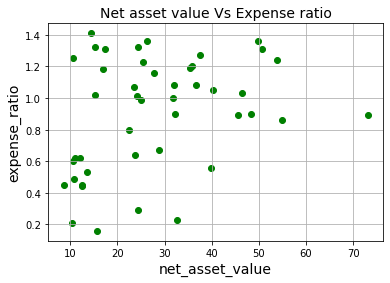

In [16]:
plt.scatter(df['net_asset_value'], df['expense_ratio'], color='green')
plt.title('Net asset value Vs Expense ratio', fontsize=14)
plt.xlabel('net_asset_value', fontsize=14)
plt.ylabel('expense_ratio', fontsize=14)
plt.grid(True)
plt.show()

In [17]:
# Building the model
X = np.array(df[['net_asset_value', 'expense_ratio']])
y = np.array(df['five_year_avg_return']).reshape(-1,1)

model_lin = LinearRegression().fit(X, y)

# Evaluating the model
y_pred = model_lin.predict(X)
resid = y - y_pred

# intersept = np.round(model_lin.intercept_[0], 2)
# coeff = np.round(model_lin.coef_[0], 2)
# print(intersept)
# print(coeff)
# print(f'y-hat = {intersept} {coeff[0]}*net_asset_value + {coeff[1]}*expense_ratio')

In [18]:
mae2 = mean_absolute_error(y, y_pred)
mse2 = mean_squared_error(y, y_pred)
rmse2 = np.sqrt(mse2)

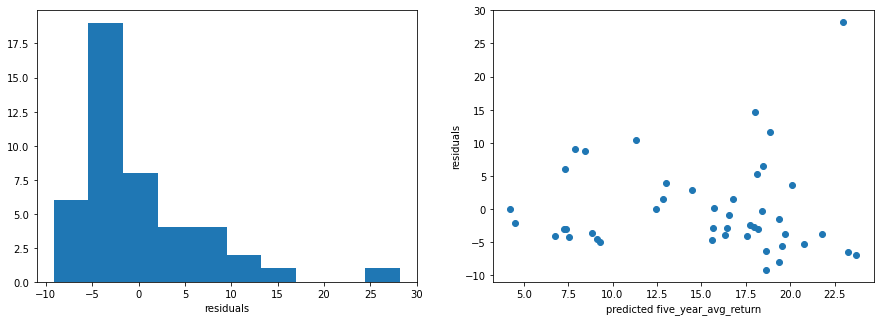

In [19]:
# Residual plot and the distribution of the residuals
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(resid)
plt.xlabel('residuals')

plt.subplot(122)
plt.scatter(y_pred, resid)
plt.xlabel('predicted five_year_avg_return')
plt.ylabel('residuals')
plt.show()

In [20]:
print('r-sq = ', model_lin.score(X, y))

r-sq =  0.37310517954477973


#### Predict the 5-Year Average Return for the fund we are interesed in (bolded above; use only the variables you need for the model)

In [21]:
#expense ratio of 1.05
#Net Asset Value of 35.53

X_pred = [[35.53, 1.05]]
#print(X_pred)
y_pred = model_lin.predict(X_pred)
print('prediction = ', y_pred[0][0])

prediction =  17.909543677496266


#### Include the categorical variables (Fund Type and Morningstar Rank) in a new multilinear model

In [22]:
# Encoding the target variable
encoder = OrdinalEncoder()
encoder.fit(np.array(df['fund_type']).reshape(-1, 1))
df['fund_type_code'] = encoder.transform(np.array(df['fund_type']).reshape(-1, 1))

encoder = OrdinalEncoder()
encoder.fit(np.array(df['morningstar_rank']).reshape(-1, 1))
df['morningstar_rank_code'] = encoder.transform(np.array(df['morningstar_rank']).reshape(-1, 1))

In [23]:
display(df.head())

,fund_name,fund_type,net_asset_value,expense_ratio,morningstar_rank,five_year_avg_return,fund_type_code,morningstar_rank_code
0,Amer Cent Inc & Growth Inv,DE,28.88,0.67,2-Star,12.39,0.0,0.0
1,American Century Intl. Disc,IE,14.37,1.41,3-Star,30.53,2.0,1.0
2,American Century Tax-Free Bond,FI,10.73,0.49,4-Star,3.34,1.0,2.0
3,American Century Ultra,DE,24.94,0.99,3-Star,10.88,0.0,1.0
4,Ariel,DE,46.39,1.03,2-Star,11.32,0.0,0.0


In [63]:
#expense ratio of 1.05
#Net Asset Value of 35.53
# fund_type_code = 0.0
# morningstar_rank_code = 1.0

y_pred4 = model_lin4.predict(X_pred4)
print('prediction = ', y_pred4[0][0])
X_pred4 = [[35.53, 1.05, 0.0, 1.0]]
#print(X_pred)

resid4 = y4 - y_pred4

prediction =  15.254795607318123


In [65]:
# Building the model
X4 = np.array(df[['net_asset_value', 'expense_ratio', 'fund_type_code', 'morningstar_rank_code']])
y4 = np.array(df['five_year_avg_return']).reshape(-1,1)

model_lin4 = LinearRegression().fit(X4, y4)

# Evaluating the model
y_pred4 = model_lin4.predict(X4)
resid4 = y4 - y_pred4

# intersept = np.round(model_lin.intercept_[0], 2)
# coeff = np.round(model_lin.coef_[0], 2)
# print(intersept)
# print(coeff)
# print(f'y-hat = {intersept} {coeff[0]}*net_asset_value + {coeff[1]}*expense_ratio')

In [66]:
mae4 = mean_absolute_error(y4, y_pred4)
mse4 = mean_squared_error(y4, y_pred4)
rmse4 = np.sqrt(mse4)

In [67]:
print('r-sq = ', model_lin4.score(X4, y4))

r-sq =  0.5121278918325249


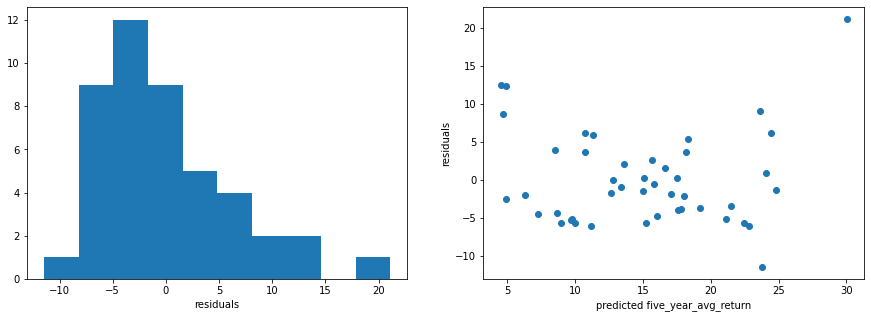

In [68]:
# Residual plot and the distribution of the residuals
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(resid4)
plt.xlabel('residuals')

plt.subplot(122)
plt.scatter(y_pred4, resid4)
plt.xlabel('predicted five_year_avg_return')
plt.ylabel('residuals')
plt.show()

#### Compare the two models using MAE, MSE and RMSE and decide which one performs better (use the original data to make the assessment, no need to split it into train and test)

In [69]:
print('Model with two features:')
print('MAE = ', mae2)
print('MSE = ', mse2)
print('RMSE = ', rmse2)

Model with two features:
MAE =  5.07745503127636
MSE =  47.54545799349688
RMSE =  6.895321456864566


In [70]:
print('Model with four features:')
print('MAE = ', mae4)
print('MSE = ', mse4)
print('RMSE = ', rmse4)

Model with four features:
MAE =  4.692991934847559
MSE =  37.001586339844984
RMSE =  6.082892925232613


#### Decide which one performs better

In [33]:
print('The model with four features performs better, it has lower absolute error and higher r^2.')

The model with four features performs better, it has lower absolute error and higher r^2.


## Problem 3
The file `weights_and_mpg.csv` contains some data about cars. The goal is to build a model that can be used to predict the **mileage** of a car (i.e. the fuel efficiency) based on the car's weight.
* Build a linear model of the mileage using weight as input. Give reasons why the linear model is **not** appropriate for these data.
* Build a quadratic model for the mileage using weight as input by transforming the data using appropriate polynomial transformation. Provide evidence that this model is (more) appropriate for the data than the linear model.

In [34]:
# nelinearen model. Dali zavisat, ne zavisat. Posle se pravi kvadraten model (koj e podobar, no ne e soodveten). Ne treba da gi sporeduvame modelite, ocigledno kvadratniot e podobar.

In [35]:
# Load the data
df_3 = pd.read_csv('weights_and_mpg.csv')
display(df_3.head())

,weight,mpg
0,4.360,16.9
1,4.054,15.5
2,3.605,19.2
3,3.940,18.5
4,2.155,30.0


<AxesSubplot:xlabel='weight', ylabel='mpg'>

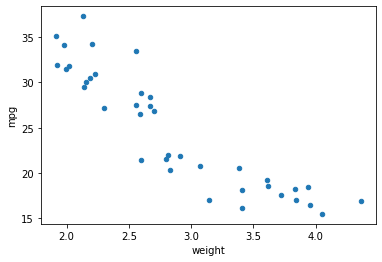

In [36]:
#Build a linear model of the mileage using weight as input. Give reasons why the linear model is not appropriate for these data.
df_3.plot(kind='scatter', x='weight', y='mpg')

In [37]:
# Build the model
X = np.array(df_3['weight']).reshape(-1,1)
y = np.array(df_3['mpg']).reshape(-1,1)

lin_model = LinearRegression()
lin_model.fit(X,y)

LinearRegression()

r-sq =  0.8155369188106257


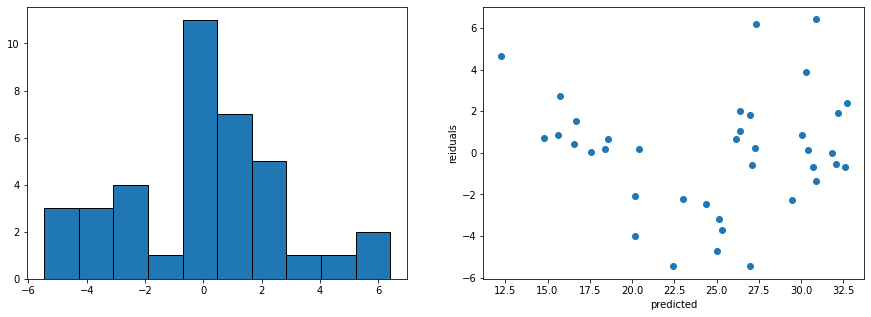

In [38]:
# Establishing if the model is good
# Use r^2 and residuals
print('r-sq = ', lin_model.score(X,y))

# Residual plot and the distribution of the residuals
y_pred = lin_model.predict(X)
resid_3 = y - y_pred

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(resid_3, edgecolor='k')

plt.subplot(122)
plt.scatter(y_pred, resid_3)
plt.ylabel('reiduals')
plt.xlabel('predicted')
plt.show()

In [39]:
print('Even though almost 82% of the fuel efficiency depends on the cars weight, the linear model is not appropriate for this data, as the predicted data has a pattern form (to me it looks like a rooster :)')

Even though almost 82% of the fuel efficiency depends on the cars weight, the linear model is not appropriate for this data, as the predicted data has a pattern form (to me it looks like a rooster :)


In [40]:
#Build a quadratic model for the mileage using weight as input by transforming the data using appropriate polynomial transformation. 
#Provide evidence that this model is (more) appropriate for the data than the linear model.

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# Instance the transformer, transform the data
poly_trans = PolynomialFeatures(degree=2)
poly_trans.fit(X)
X_trans = poly_trans.transform(X)

# Build the model # izlezot da zavisi linearno od vleznite podatoci
quad_model = LinearRegression()
quad_model.fit(X_trans,y)

LinearRegression()

In [42]:
# Establishing if the model is good
# Use r^2 and residuals
print('r-sq = ', quad_model.score(X_trans,y))

r-sq =  0.8597310866068941


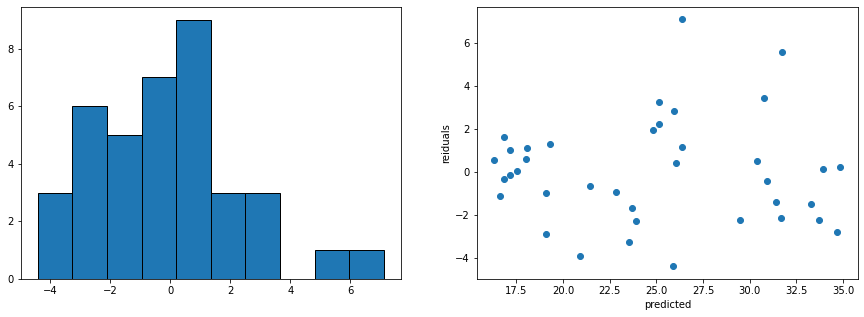

The quadratic model is more appropriate, mainly due to the higher fuel efficiency depends on the cars weight of 85% as well as the unpattern predicted data(looks like three clusters, with two exemptions). To sum up, this model is more appropriate then the linear, but not a good enough.


In [43]:
# Residual plot and the distribution of the residuals
y_pred_quad = quad_model.predict(X_trans)
resid_quad = y - y_pred_quad

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(resid_quad, edgecolor='k')

plt.subplot(122)
plt.scatter(y_pred_quad, resid_quad)
plt.ylabel('reiduals')
plt.xlabel('predicted')

plt.show()

print('The quadratic model is more appropriate, mainly due to the higher fuel efficiency depends on the cars weight of 85% as well as the unpattern predicted data(looks like three clusters, with two exemptions). To sum up, this model is more appropriate then the linear, but not a good enough.')

## Problem 4
The file `gender_classification.csv` contains data about the gender, weights and heights of 10000 people. The goal of this task is to build a logistic regression model to predict the gender of a person based on their height and weight
* Split the given data set into a **train** and **test set**. To ensure everyone gets the same results, use `random_state=1234`
* Build the logistic model using the train data
* In the next step, evaluate the model's performance on the test data. Construct the confusion matrix, and calculate the model's mean accuracy score
* Finally, make a prediction about the gender of the median person and the mean person, i.e. the persons who have median/mean height and median/mean weight.

In [44]:
# logicka regresija. Vo train i test, ke zememe po default 0.25

In [45]:
# Load the data
df_4 = pd.read_csv('gender_classification.csv')
display(df_4.head())
display(df_4.tail())
df_4.shape

,height,weight,gender
0,162.6,66.6,Female
1,164.7,71.9,Female
2,153.0,43.5,Female
3,182.9,95.7,Male
4,163.1,56.6,Female


,height,weight,gender
9995,155.9,64.2,Female
9996,146.8,46.9,Female
9997,172.5,78.9,Male
9998,161.1,53.9,Female
9999,161.8,60.8,Female


(10000, 3)

In [46]:
# Encoding the target variable
encoder = OrdinalEncoder()
encoder.fit(np.array(df_4['gender']).reshape(-1, 1))
df_4['gender_code'] = encoder.transform(np.array(df_4['gender']).reshape(-1, 1))
display(df_4.head())

,height,weight,gender,gender_code
0,162.6,66.6,Female,0.0
1,164.7,71.9,Female,0.0
2,153.0,43.5,Female,0.0
3,182.9,95.7,Male,1.0
4,163.1,56.6,Female,0.0


In [47]:
df_4.describe()

,height,weight,gender_code
count,10000.000000,10000.000000,10000.000000
mean,168.573940,73.228260,0.500000
std,9.772842,14.563851,0.500025
min,137.800000,29.300000,0.000000
25%,161.300000,61.600000,0.000000
50%,168.400000,73.100000,0.500000
75%,175.700000,84.900000,1.000000
max,200.700000,122.500000,1.000000


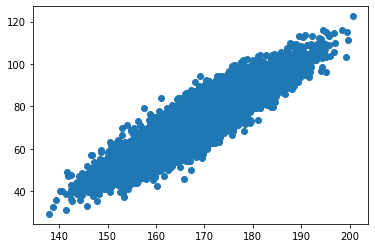

In [48]:
# Plot the data
plt.figure()
plt.scatter(df_4['height'], df_4['weight'])
plt.show()

In [49]:
#Split the given data set into a train and test set. To ensure everyone gets the same results, use random_state=1234

# Get the data in numpy form
X = np.array(df_4[['height', 'weight']])
y = np.array(df_4['gender'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [50]:
# Building the model based on height and weight
model_gender = LogisticRegression().fit(X, y)

Evaluating the model on the TRAIN data (no very telling):
Accuracy:  0.9221333333333334
Evaluating the model on the TEST data (appropriate):
Accuracy:  0.9112


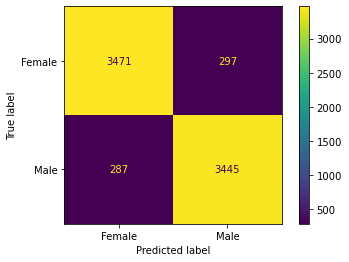

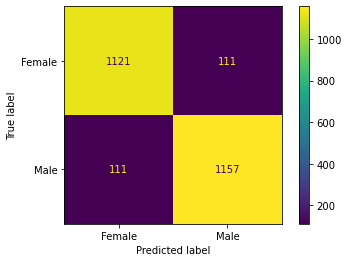

In [51]:
# make a prediction for the TEST data
y_pred_gender = model_gender.predict_proba(X_test)

# Making predictions, and evaluate the model
print('Evaluating the model on the TRAIN data (no very telling):')
print('Accuracy: ', model_gender.score(X_train, y_train))

print('Evaluating the model on the TEST data (appropriate):')
print('Accuracy: ', model_gender.score(X_test, y_test))
       
plot_confusion_matrix(model_gender, X_train, y_train)
plot_confusion_matrix(model_gender, X_test, y_test)

#* Model score on the test data =  0.9112

#### Make a prediction about the gender of the median person and the mean person, i.e. the persons who have median/mean height and median/mean weight

In [52]:
# Caclulating mean and median height
mean_hight = np.mean(df_4['height'])
median_height = np.median(df_4['height'])
print('mean_hight =', mean_hight)
print('median_height =', median_height)

mean_hight = 168.5739400000003
median_height = 168.4


In [53]:
# Caclulating mean and median weight
mean_weight = np.mean(df_4['weight'])
median_weight = np.median(df_4['weight'])
print('mean_weight =', mean_weight)
print('median_weight =', median_weight)

mean_weight = 73.22825999999979
median_weight = 73.1
